In [1]:
import numpy as np

x = np.random.randn(1000)

mean = x.mean()
std = x.std()

x_norm = (x - mean) / std

print(x_norm.mean(), x_norm.var())


-7.105427357601002e-18 0.9999999999999997


In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)

df = pd.DataFrame({
    "age": np.random.randint(18, 71, 1000),
    "income": np.random.randint(25000, 180001, 1000),
    "education_years": np.random.randint(0, 21, 1000)
})

p75 = df["income"].quantile(0.75)

high_income = df[df["income"] > p75]

mean_edu_all = df["education_years"].mean()
mean_edu_high = high_income["education_years"].mean()

print("Mean education (all):", mean_edu_all)
print("Mean education (income > 75th percentile):", mean_edu_high)


Mean education (all): 10.037
Mean education (income > 75th percentile): 10.224


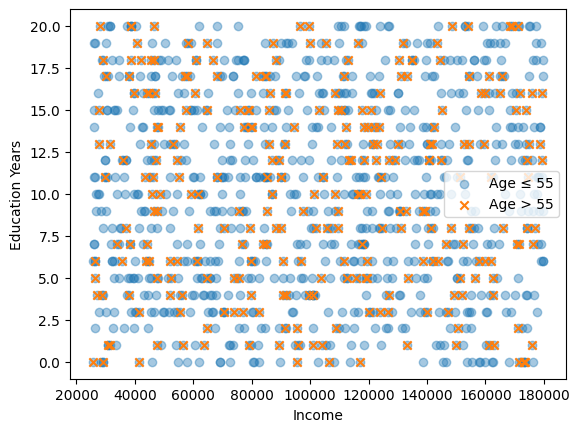

In [3]:
import matplotlib.pyplot as plt


plt.figure()
plt.scatter(df["income"], df["education_years"], alpha=0.4, label="Age ≤ 55")


older = df[df["age"] > 55]
plt.scatter(
    older["income"],
    older["education_years"],
    marker="x",
    label="Age > 55"
)

plt.xlabel("Income")
plt.ylabel("Education Years")
plt.legend()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


df["target"] = ((df["income"] > 100000) & (df["education_years"] > 12)).astype(int)

X = df[["income", "education_years"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))


[[241   8]
 [ 11  40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       249
           1       0.83      0.78      0.81        51

    accuracy                           0.94       300
   macro avg       0.89      0.88      0.89       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
# When KNN performs better than Logistic Regression:
# KNN works better when the decision boundary is non-linear and irregular, the data is properly scaled, and noise is low. In such cases, KNN can capture local patterns that Logistic Regression (with its linear boundary) cannot.

# When KNN performs worse than Logistic Regression:
# KNN performs worse when features are on different scales, the data contains noise or outliers, or the true boundary is approximately linear. It also degrades with high-dimensional data and large datasets, where Logistic Regression is more stable, faster, and generalizes better.